**IMPORTING THE NECESSARY LIBRARIES**

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [33]:
#Loading the dataset
df = pd.read_csv("voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


***EDA(EXPLORATORY DATA ANALYSIS)***

In [34]:
print(df.isnull().sum())
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64
Total number of labels: 3168
Number of male: 1584
Number of female: 1584


**Encoding, Stardization and Getting the Data ready for training**

In [35]:
#Since there are no null values
X=df.iloc[:, :-1]

## Encoding
y=df.iloc[:,-1]
enc = LabelEncoder()
y = enc.fit_transform(y)

## Standard
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

We are going to test the dataset for different models and get the one with the best accuracy

In [36]:
def test_model(model):
  scores = cross_val_score(model, X, y, cv=8, scoring='accuracy')
  acc = scores.mean()
  return acc

In [37]:
clf1 = SVC(kernel='linear')
clf2 = SVC(kernel='rbf')
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier(n_estimators=80, criterion='entropy')
clf5 = XGBClassifier(learning_rate=0.05, n_jobs=4)
clfs = [clf1, clf2, clf3, clf4, clf5]

In [38]:
for clf in clfs:
  acc = test_model(clf)
  print(clf, 'Accuracy score:', acc, "\n")

SVC(kernel='linear') Accuracy score: 0.96875 

SVC() Accuracy score: 0.9715909090909091 

DecisionTreeClassifier() Accuracy score: 0.9494949494949495 

RandomForestClassifier(criterion='entropy', n_estimators=80) Accuracy score: 0.96875 

XGBClassifier(learning_rate=0.05, n_jobs=4) Accuracy score: 0.9684343434343434 



# **Hyper-Parameter Tuning for different models**



> **Hyper Parameter Tuning for Support Vector Machines with Linear Kernel**

[0.96875, 0.96875, 0.9684343434343434, 0.9681186868686869, 0.9681186868686869, 0.9681186868686869, 0.9681186868686869, 0.9681186868686869, 0.9681186868686869, 0.9681186868686869, 0.9681186868686869, 0.9681186868686869, 0.9681186868686869, 0.9681186868686869]


Text(0.5, 1.0, 'SVC with linear kernel')

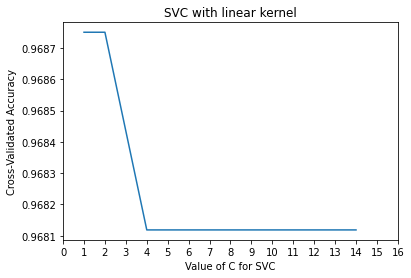

In [39]:
C_range=list(range(1,15))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    acc = test_model(svc)
    acc_score.append(acc)
print(acc_score)    
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,17))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('SVC with linear kernel')

[0.9693813131313131, 0.9690656565656566, 0.9693813131313131, 0.9690656565656566, 0.96875, 0.9684343434343434, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.9690656565656566, 0.96875, 0.96875, 0.9690656565656566, 0.96875, 0.96875, 0.9684343434343434, 0.9684343434343434, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875]


Text(0.5, 1.0, 'SVC with linear kernel 2')

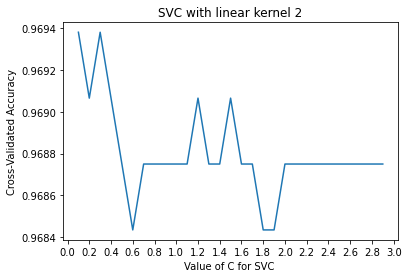

In [40]:
#Clearly, the above plot shows that for C<2, we have an accuracy of 97%
#And for C>3, the cross val accuracy dips, so we perform more analysis to get a better interval for C in the range 0<C<3
C_range=list(np.arange(0.1,3,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    acc = test_model(svc)
    acc_score.append(acc)
print(acc_score)   
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0.0,3.2,0.2))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')
plt.title('SVC with linear kernel 2')

From the above plot, we can see the best interval for the hyper parameter, C, is 
0.1-0.3


> ***Hyper Paramter Tuning for SVM with Radial Basis Function(RBF) Kernel***

[0.9589646464646464, 0.9678030303030303, 0.9397095959595959, 0.8964646464646464, 0.6878156565656566, 0.5956439393939394]


Text(0.5, 1.0, 'SVC with rbf kernel 1')

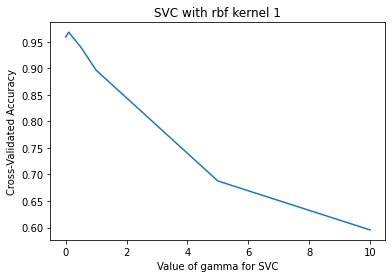

In [41]:
gamma_range=[0.001,0.1,0.5,1,5,10]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    acc = test_model(svc)
    acc_score.append(acc)
print(acc_score)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC')
plt.xticks(np.arange(0.0001,11,2))
plt.ylabel('Cross-Validated Accuracy')
plt.title('SVC with rbf kernel 1')

[0.9703282828282829, 0.970959595959596, 0.9722222222222222, 0.9715909090909091, 0.9715909090909091]


Text(0.5, 1.0, 'SVC with rbf kernel 2')

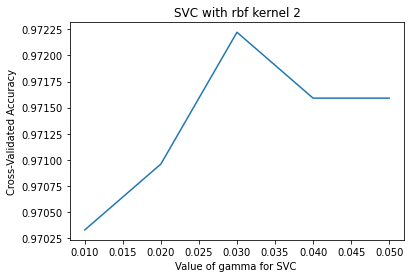

In [42]:
#Clearly the accuracy of the model reduces as gamma increases,
#We will get a better interval of gamma for gamma<0.1
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    acc = test_model(svc)
    acc_score.append(acc)
print(acc_score)    
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')
plt.title('SVC with rbf kernel 2')

We can say the best value for gamma is approxiamtely 0.03


In [43]:
tuned_parameters = {
    'C':  (np.arange(0.1,0.5,0.1)),
        'gamma':[0.01,0.02,0.03,0.04,0.05],
    
     "kernel":[ 'rbf', 'linear']

}
svm_model= SVC()

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=8,scoring='accuracy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_svm.fit(X_train, y_train)

print(model_svm.best_score_)
print(model_svm.best_params_)

y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9771093718803658
{'C': 0.4, 'gamma': 0.05, 'kernel': 'rbf'}
0.9747634069400631




> **Hyper Parameter Tuning for XGBoost**



In [44]:
X = df.iloc[:, :-1]

y = df.iloc[:, -1]
enc = LabelEncoder()
y = enc.fit_transform(y)

clf1 = XGBClassifier()
clf2 = XGBClassifier(learning_rate=0.05, gamma=2)
clf3 = XGBClassifier(learning_rate=0.2, gamma=4, n_jobs=4)
clf4 = XGBClassifier(learning_rate=0.05, gamma=4, n_jobs=4)
clfs = [clf1, clf2, clf3, clf4]

for model in clfs:
  acc = test_model(model)
  print(acc, 'for', model)

0.9696969696969697 for XGBClassifier()
0.9681186868686869 for XGBClassifier(gamma=2, learning_rate=0.05)
0.9700126262626263 for XGBClassifier(gamma=4, learning_rate=0.2, n_jobs=4)
0.9684343434343434 for XGBClassifier(gamma=4, learning_rate=0.05, n_jobs=4)
